In [42]:
# Download dataset: Seoul Bike Sharing Demand
# https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand
%pip install ucimlrepo

# import
import matplotlib.pyplot as plt
import pandas as pd
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import numpy as np
import plotly.express as px
from ipywidgets import interact, widgets

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import data, show metadata

# https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

seoul_bike_sharing_demand = fetch_ucirepo(id=560)
# print(seoul_bike_sharing_demand)

# metadata
print(seoul_bike_sharing_demand.metadata)

# variable information
print(seoul_bike_sharing_demand.variables)


{'uci_id': 560, 'name': 'Seoul Bike Sharing Demand', 'repository_url': 'https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand', 'data_url': 'https://archive.ics.uci.edu/static/public/560/data.csv', 'abstract': 'The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 8760, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Functioning Day'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5F62R', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and a

In [4]:
# data (as pandas dataframes)
X = seoul_bike_sharing_demand.data.features
Y = seoul_bike_sharing_demand.data.targets

# print(X)
# print(y)


# Nulls. Zero nulls
# print(X.isnull().sum())
# print(y.isnull().sum())

X


,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday


In [5]:
Y

,Functioning Day
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
8755,Yes
8756,Yes
8757,Yes
8758,Yes


In [6]:
data = X.join(Y)
data["Date"] = pd.to_datetime(data["Date"], dayfirst=True)
data


,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
Y_features_names = ["Rented Bike Count"]
Y = data[Y_features_names]
X = data.drop(Y_features_names, axis=1)
X

,Date,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,2017-12-01,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


# 1. Глубокий анализ временных рядов

## 1.1 Агрегация по периодам времени


In [8]:
def group_by_date(df, resample="D"):
    return df.set_index(["Date"]).resample(resample)


# day
gr = group_by_date(data, resample="D")["Rented Bike Count"]
pd.DataFrame({"Mean": gr.mean(), "Sum": gr.sum()})

,Mean,Sum
Date,,
2017-12-01,397.458333,9539
2017-12-02,355.125000,8523
2017-12-03,300.916667,7222
2017-12-04,363.708333,8729
2017-12-05,346.125000,8307
...,...,...
2018-11-26,715.083333,17162
2018-11-27,678.416667,16282
2018-11-28,688.500000,16524


In [9]:
# week
gr = group_by_date(data, resample="W-Mon")["Rented Bike Count"]
pd.DataFrame({"Mean": gr.mean(), "Sum": gr.sum()})

,Mean,Sum
Date,,
2017-12-04,354.302083,34013
2017-12-11,286.255952,48091
2017-12-18,215.113095,36139
2017-12-25,204.904762,34424
2018-01-01,219.958333,36953
2018-01-08,249.898810,41983
2018-01-15,189.589286,31851
2018-01-22,249.428571,41904
2018-01-29,135.642857,22788


In [10]:
# month
gr = group_by_date(data, resample="M")["Rented Bike Count"]
pd.DataFrame({"Mean": gr.mean(), "Sum": gr.sum()})

/tmp/ipykernel_5167/2662111961.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return df.set_index(["Date"]).resample(resample)


,Mean,Sum
Date,,
2017-12-31,249.099462,185330
2018-01-31,201.620968,150006
2018-02-28,225.941964,151833
2018-03-31,511.551075,380594
2018-04-30,728.093056,524227
2018-05-31,950.387097,707088
2018-06-30,1245.676389,896887
2018-07-31,987.177419,734460
2018-08-31,876.192204,651887


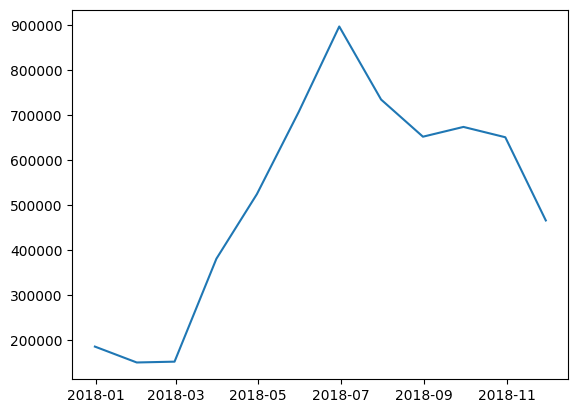

In [11]:
plt.plot(gr.sum())

<BarContainer object of 7 artists>

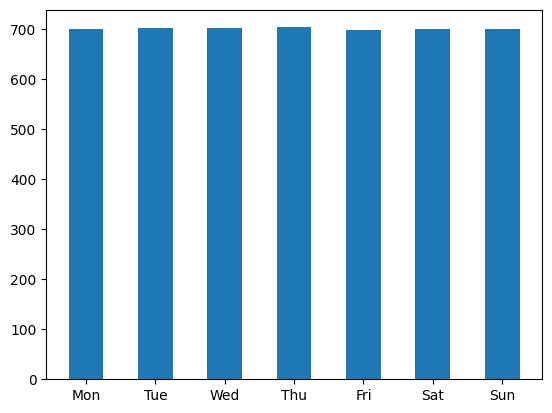

In [12]:
week_days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
values_in_week_days = []
for d in week_days:
    gr = group_by_date(data, resample=f"W-{d[:3]}")["Rented Bike Count"]
    values_in_week_days.append(gr.mean().mean())
plt.bar(week_days, values_in_week_days, width=0.5)

## 1.2 Сезонные закономерности


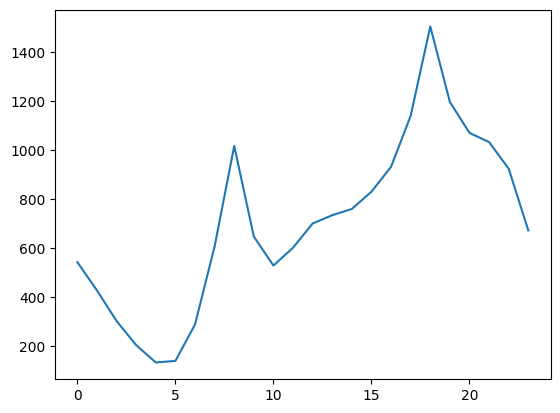

In [13]:
plt.plot(data.groupby(["Hour"])["Rented Bike Count"].mean())

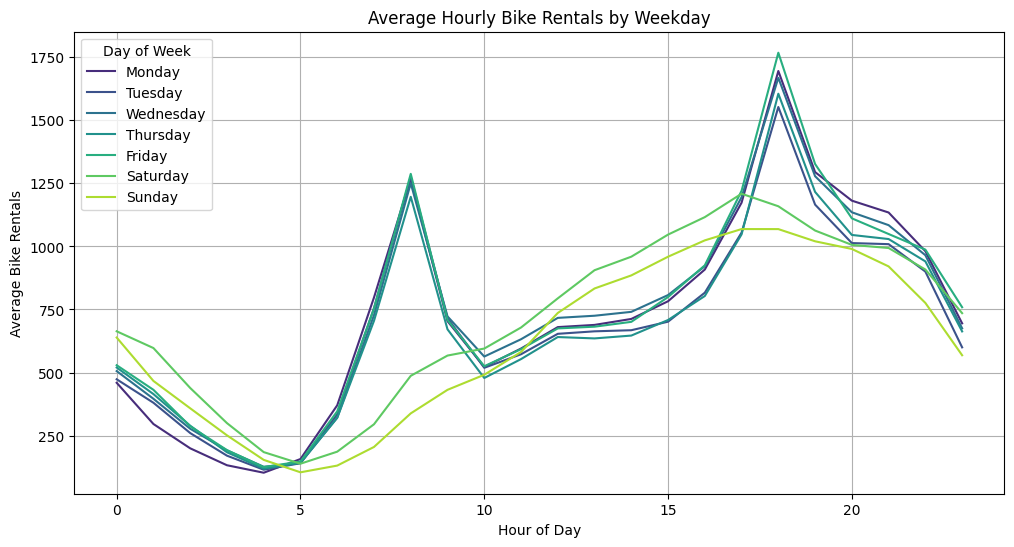

In [14]:
def plot_hourly_weekday_bikes(df):
    df = df.copy()

    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
    df["Weekday"] = df["Date"].dt.day_name()

    grouped = df.groupby(["Weekday", "Hour"])["Rented Bike Count"].mean().reset_index()

    week_days= [
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ]
    grouped["Weekday"] = pd.Categorical(
        grouped["Weekday"], categories=week_days, ordered=True
    )
    grouped = grouped.sort_values("Weekday")

    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=grouped, x="Hour", y="Rented Bike Count", hue="Weekday", palette="viridis"
    )
    plt.title("Average Hourly Bike Rentals by Weekday")
    plt.xlabel("Hour of Day")
    plt.ylabel("Average Bike Rentals")
    plt.legend(title="Day of Week")
    plt.grid(True)
    plt.show()
plot_hourly_weekday_bikes(data)

По будням есть час-пики


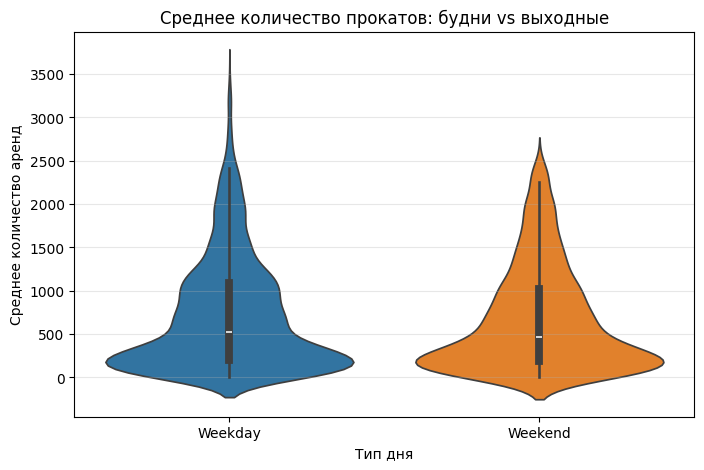

Средние значения:
  Weekday_Type  Rented Bike Count
0      Weekday         719.448914
1      Weekend         667.342147

Разница: 7.8%


In [15]:
def compare_weekday_weekend_rentals(df ):
    df = df.copy()

    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

    df["Weekday_Type"] = df["Date"].dt.dayofweek.apply(
        lambda x: "Weekday" if x < 5 else "Weekend"
    )

    grouped = df.groupby("Weekday_Type")["Rented Bike Count"].mean().reset_index()


    plt.figure(figsize=(8, 5))
    sns.violinplot(
        data=pd.DataFrame({"Weekday":df[df["Weekday_Type"] == "Weekday"]["Rented Bike Count"],
        "Weekend":df[df["Weekday_Type"] == "Weekend"]["Rented Bike Count"]}),
        palette=["#1f77b4", "#ff7f0e"],
    )
    plt.title("Среднее количество прокатов: будни vs выходные")
    plt.xlabel("Тип дня")
    plt.ylabel("Среднее количество аренд")

    plt.grid(axis="y", alpha=0.3)
    plt.show()

    weekday_mean = grouped.loc[
        grouped["Weekday_Type"] == "Weekday", "Rented Bike Count"
    ].values[0]
    weekend_mean = grouped.loc[
        grouped["Weekday_Type"] == "Weekend", "Rented Bike Count"
    ].values[0]
    difference_pct = ((weekday_mean - weekend_mean) / weekend_mean) * 100

    return grouped, difference_pct

avg_rentals, difference = compare_weekday_weekend_rentals(data)

print("Средние значения:")
print(avg_rentals)
print(f"\nРазница: {difference:.1f}%")


# 2. Обогащение и соединение данных

## 2.1 Интеграция нескольких источников


In [16]:
rentals_data = pd.read_csv('data/synthetic_rentals.csv')
stations_data = pd.read_csv('data/synthetic_stations.csv')
users_data = pd.read_csv('data/synthetic_users.csv')

In [17]:
rentals_data

,rental_id,date,hour,minute,user_id,station_id,duration_minutes
0,R000000,2017-01-01,0,45,U0010,S034,28
1,R000001,2017-01-01,0,17,U0824,S031,31
2,R000002,2017-01-01,0,38,U0954,S035,45
3,R000003,2017-01-01,0,41,U0047,S061,55
4,R000004,2017-01-01,0,25,U0908,S079,21
...,...,...,...,...,...,...,...
39700,R039700,2017-01-31,0,52,U0450,S028,43
39701,R039701,2017-01-31,0,58,U0335,S098,47
39702,R039702,2017-01-31,0,0,U0628,S040,52
39703,R039703,2017-01-31,0,13,U0220,S078,34


In [18]:
stations_data

,station_id,station_name,district,latitude,longitude,location_type,capacity,peak_hours,peak_days,usage_intensity
0,S001,Dongdaemun Station 6,Dongdaemun,37.667576,127.081480,mixed,23,"8,9,12,13,17,18,19",all,0.68
1,S002,Mapo Station 8,Mapo,37.588224,127.095523,mixed,30,"8,9,12,13,17,18,19",all,0.52
2,S003,Dongdaemun Station 8,Dongdaemun,37.673043,126.849501,mixed,39,"8,9,12,13,17,18,19",all,0.60
3,S004,Yeongdeungpo Station 6,Yeongdeungpo,37.696972,127.088342,mixed,22,"8,9,12,13,17,18,19",all,0.49
4,S005,Gangnam Station 10,Gangnam,37.628139,127.158919,business,49,"8,9,17,18,19",weekday,0.99
...,...,...,...,...,...,...,...,...,...,...
95,S096,Yeongdeungpo Station 7,Yeongdeungpo,37.425160,126.787347,transit,41,"7,8,9,17,18,19,20",weekday,0.83
96,S097,Yeongdeungpo Station 8,Yeongdeungpo,37.541027,126.972943,mixed,17,"8,9,12,13,17,18,19",all,0.44
97,S098,Yongsan Station 8,Yongsan,37.655234,126.864140,mixed,34,"8,9,12,13,17,18,19",all,0.42
98,S099,Seodaemun Station 1,Seodaemun,37.529802,126.918407,transit,31,"7,8,9,17,18,19,20",weekday,0.89


In [40]:
district_usage_mean = stations_data.groupby(['district'])['usage_intensity'].mean()
district_usage_mean

district
Dongdaemun      0.559091
Eunpyeong       0.485455
Gangnam         0.820000
Jongno          0.596667
Mapo            0.546250
Nowon           0.483636
Seocho          0.627273
Seodaemun       0.612500
Yeongdeungpo    0.765455
Yongsan         0.514000
Name: usage_intensity, dtype: float64

In [20]:
users_data

,user_id,user_type,registration_date,preferred_hours,preferred_days,avg_rentals_per_month
0,U0001,periodic,2022-10-22,"10,11,12,13,14,15,16",weekday,4
1,U0002,rare,2022-04-28,"7,8,9",weekday,2
2,U0003,rare,2023-09-22,"7,8,9",weekend,3
3,U0004,periodic,2023-07-22,"7,8,17,18,19",weekend,7
4,U0005,frequent,2023-06-08,"7,8,9,12,13,17,18,19",weekday,32
...,...,...,...,...,...,...
995,U0996,frequent,2022-09-08,"7,8,9,17,18,19",weekday,15
996,U0997,rare,2024-05-24,"7,8,9",all,3
997,U0998,frequent,2022-04-05,"7,8,9,17,18,19",weekday,31
998,U0999,rare,2023-08-31,"16,17,18,19,20",all,1


In [21]:
rentals_data.groupby(['date', 'hour'])['user_id'].count()

date        hour
2017-01-01  0       58
            1       80
            2       10
            3       54
            4       67
                    ..
2017-01-30  20      33
            21      88
            22      90
            23      14
2017-01-31  0       25
Name: user_id, Length: 721, dtype: int64

## 2.2 Работа с пропущенными данными


In [22]:
# find locs with nulls - empty
print(rentals_data[rentals_data.isnull().any(axis = 1)].index)
print(stations_data[stations_data.isnull().any(axis=1)].index)
print(users_data[users_data.isnull().any(axis=1)].index)

Index([], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')


# 3. Нестандартная аналитика и пользовательские метрики

## 3.1 Анализ поведения клиентов (сегментация)


In [23]:
# add count_of_rental for users
users_data = users_data.join(rentals_data.groupby('user_id')['rental_id'].count(), on='user_id', how='outer').rename(columns={'rental_id' : 'count_of_rental'})
users_data

,user_id,user_type,registration_date,preferred_hours,preferred_days,avg_rentals_per_month,count_of_rental
0,U0001,periodic,2022-10-22,"10,11,12,13,14,15,16",weekday,4,43
1,U0002,rare,2022-04-28,"7,8,9",weekday,2,38
2,U0003,rare,2023-09-22,"7,8,9",weekend,3,45
3,U0004,periodic,2023-07-22,"7,8,17,18,19",weekend,7,37
4,U0005,frequent,2023-06-08,"7,8,9,12,13,17,18,19",weekday,32,48
...,...,...,...,...,...,...,...
995,U0996,frequent,2022-09-08,"7,8,9,17,18,19",weekday,15,45
996,U0997,rare,2024-05-24,"7,8,9",all,3,39
997,U0998,frequent,2022-04-05,"7,8,9,17,18,19",weekday,31,58
998,U0999,rare,2023-08-31,"16,17,18,19,20",all,1,35


Text(0.5, 1.0, 'Density histogram of count of rental')

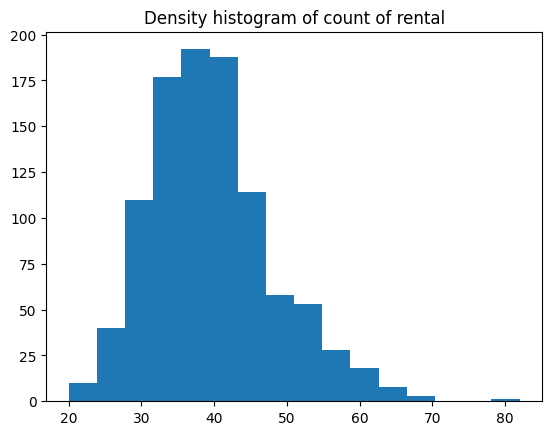

In [24]:
# show hist count of rental
plt.hist(users_data['count_of_rental'], bins=16 )
plt.title('Density histogram of count of rental')

In [25]:
# count of users type
users_data.groupby('user_type').agg({'user_id': 'count', 'avg_rentals_per_month':'mean', 'count_of_rental':'mean'})


,user_id,avg_rentals_per_month,count_of_rental
user_type,,,
frequent,225,25.835556,49.920000
periodic,487,7.987680,37.778234
rare,288,2.531250,34.982639


## 3.2 Влияние внешних факторов


                   Rented Bike Count
Temperature                 0.538558
Humidity                   -0.199780
Rainfall                   -0.123074
Rented Bike Count           1.000000


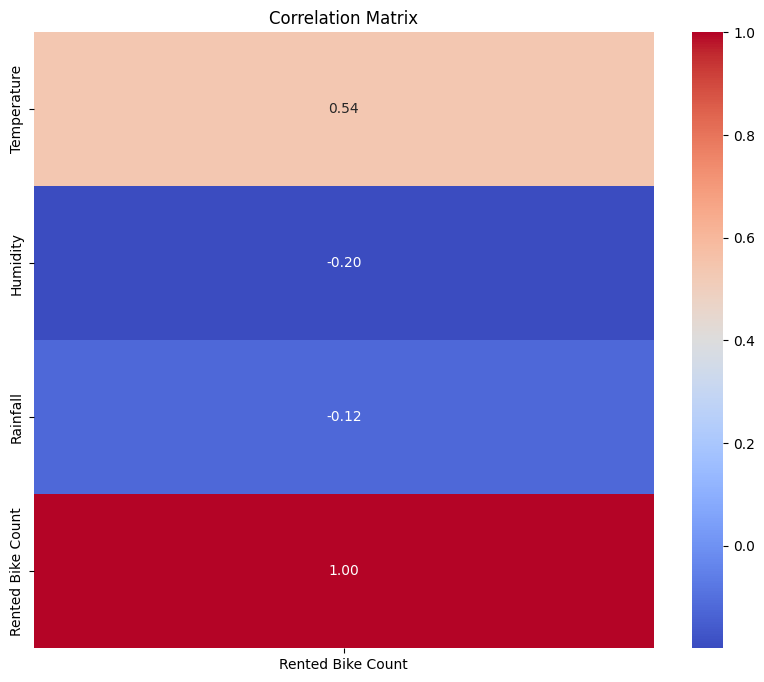

In [26]:
# Correlation analysis
numeric_cols = ["Temperature", "Humidity", "Rainfall", "Rented Bike Count"]
corr_matrix = data[numeric_cols].corr()[['Rented Bike Count']]
print(corr_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# high correlation with temperature 

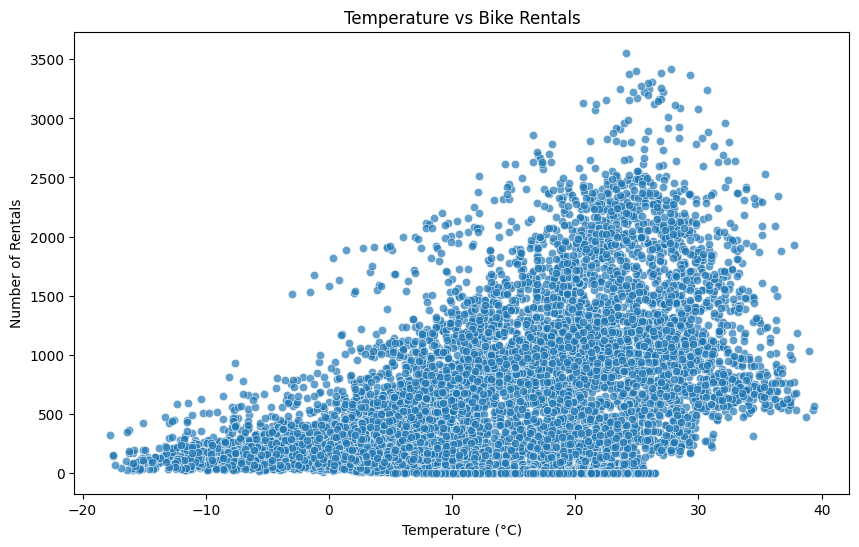

In [27]:
# Scatter plot: Temperature vs Rentals
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Temperature", y="Rented Bike Count", data=data, alpha=0.7)
plt.title("Temperature vs Bike Rentals")
plt.xlabel("Temperature (°C)")
plt.ylabel("Number of Rentals")
plt.show()


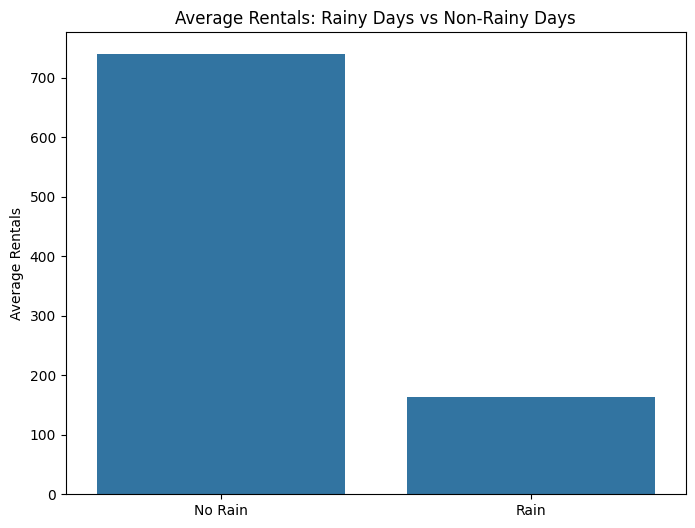

In [28]:
# Compare rainy vs non-rainy days
data["Rainy_Day"] = data["Rainfall"] > 0
rain_compare = data.groupby("Rainy_Day")["Rented Bike Count"].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x="Rainy_Day", y="Rented Bike Count", data=rain_compare)
plt.title("Average Rentals: Rainy Days vs Non-Rainy Days")
plt.xticks([0, 1], ["No Rain", "Rain"])
plt.xlabel("")
plt.ylabel("Average Rentals")
plt.show()


/tmp/ipykernel_5167/1246216290.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_compare = data.groupby("Temp_Category")["Rented Bike Count"].mean().reset_index()


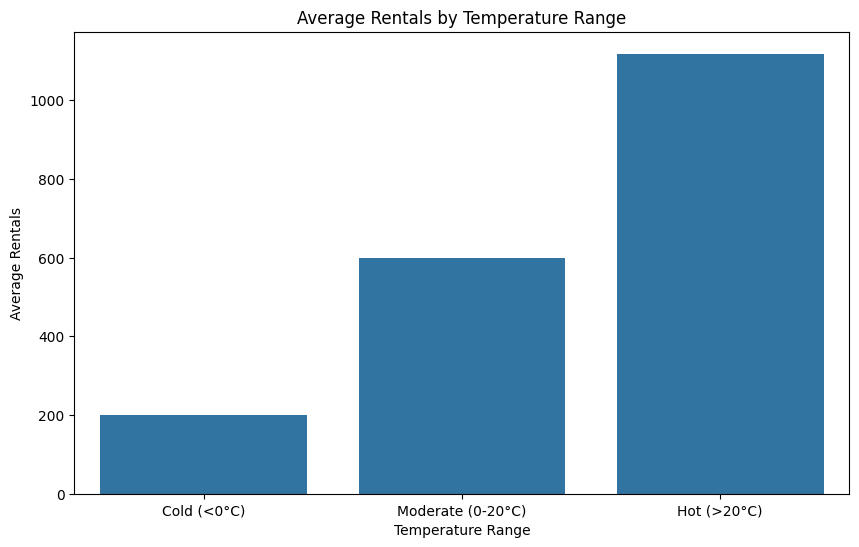

In [29]:
# Temperature range analysis
bins = [-np.inf, 0, 20, np.inf]
labels = ["Cold (<0°C)", "Moderate (0-20°C)", "Hot (>20°C)"]
data["Temp_Category"] = pd.cut(data["Temperature"], bins=bins, labels=labels)
temp_compare = data.groupby("Temp_Category")["Rented Bike Count"].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="Temp_Category", y="Rented Bike Count", data=temp_compare, order=labels)
plt.title("Average Rentals by Temperature Range")
plt.xlabel("Temperature Range")
plt.ylabel("Average Rentals")
plt.show()


In [30]:
# Temperature threshold analysis
threshold = 0
data["Below_Zero"] = data["Temperature"] < threshold
zero_compare = data.groupby("Below_Zero")["Rented Bike Count"].mean()
print(f"\nAverage rentals when temperature is below 0°C:\n{zero_compare}")



Average rentals when temperature is below 0°C:
Below_Zero
False    803.684045
True     197.990928
Name: Rented Bike Count, dtype: float64


## 3.3 Пользовательские метрики и прогнозирование


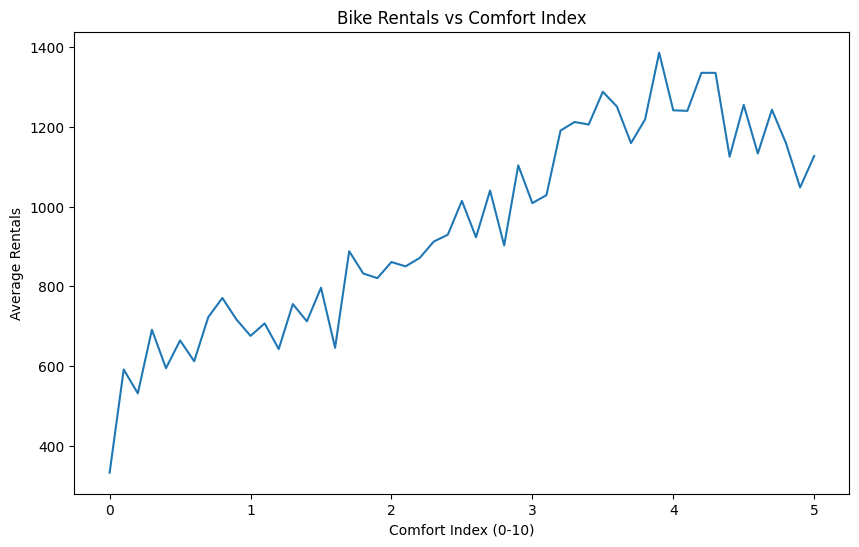

In [31]:
def calculate_comfort_index(temp, rainfall, solar_rad, wind_speed):
    temp_score = np.clip(
        5 * ((temp - 10) / 20), 
        0,
        5,
    )

    rain_penalty = np.clip(rainfall * 0.4, 0, 2)

    solar_bonus = np.clip(solar_rad / 500, 0, 2)

    wind_penalty = np.clip((wind_speed - 5) * 0.2, 0, 1)

    comfort_score = temp_score + solar_bonus - rain_penalty - wind_penalty
    return np.clip(round(comfort_score, 1), 0, 10)


data['Comfort_Index'] = data.apply(
    lambda x: calculate_comfort_index(
        x['Temperature'],
        x['Rainfall'],
        x['Solar Radiation'],
        x['Wind speed']
    ),
    axis=1
)


plt.figure(figsize=(10, 6))
sns.lineplot(
    x="Comfort_Index", y="Rented Bike Count", data=data, estimator="mean", errorbar=None
)
plt.title("Bike Rentals vs Comfort Index")
plt.xlabel("Comfort Index (0-10)")
plt.ylabel("Average Rentals")
plt.show()


In [32]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

X_model = data[["Temperature", "Rainfall", 'Solar Radiation', 'Wind speed']]
y = data["Rented Bike Count"]

model = LinearRegression()
model.fit(X_model, y)

y_pred = model.predict(X_model)

print(f"\nRegression Model Performance:")
print(f"R² Score: {r2_score(y, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y, y_pred):.1f} rentals")
print("\nCoefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.1f}")

comfort_corr = data["Comfort_Index"].corr(data["Rented Bike Count"])
print(f"\nComfort Index Correlation: {comfort_corr:.2f}")


Regression Model Performance:
R² Score: 0.33
MAE: 389.8 rentals

Coefficients:
Date: 29.5
Hour: -84.0
Temperature: 10.1
Humidity: 83.1

Comfort Index Correlation: 0.53


### интерпритация

- Индекс конфортности не отрожает всю кортину, не особо полезен и точен
- Модель линейной регрессии не очень хорошо справляется с прогнозами


Conversion successful.
No aggregated hourly data found for date: 2017-01-13
Proceeding with rental data only for 2017-01-13
--- Daily Report for 2017-01-13 ---

No aggregated hourly data available for this day.

Daily Rental Transaction Statistics (from rental data):
  Total Rental Transactions: 1293
  Rental Duration (minutes): Avg=31.83, Median=29.00, Min=10.00, Max=60.00


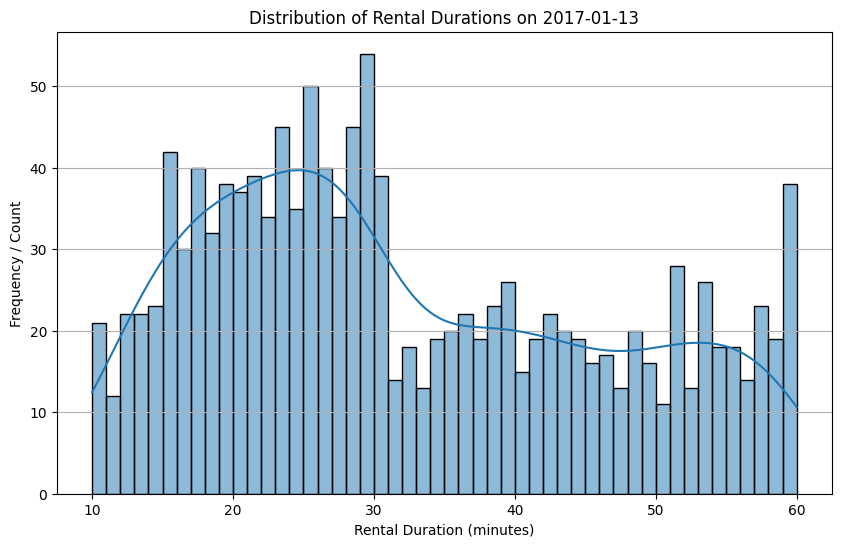

In [33]:
# Define a helper function to convert date columns safely
def convert_date_column(df: pd.DataFrame, column_name: str, dayfirst: bool = True):
    """
    Safely converts a specified column in a DataFrame to datetime objects.

    Args:
        df: The pandas DataFrame.
        column_name: The name of the column to convert.
        dayfirst: Whether to interpret the first component of a date string as the day.

    Returns:
        The DataFrame with the converted column, or the original DataFrame if conversion fails.
    """
    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in DataFrame.")
        return df
    if not pd.api.types.is_datetime64_any_dtype(df[column_name]):
         print(f"Warning: Column '{column_name}' is not of datetime type. Attempting conversion...")
         try:
             df[column_name] = pd.to_datetime(df[column_name], dayfirst=dayfirst)
             print("Conversion successful.")
         except Exception as e:
             print(f"Error converting column '{column_name}': {e}")
             print("This column might not be suitable for datetime conversion.")
             return df
    return df


def generate_report_day(data: pd.DataFrame, rentals_data: pd.DataFrame, day: str):
    """
    Generates a text report and plots for a specific day's data,
    including aggregated environmental data and individual rental details.

    Args:
        data: DataFrame with aggregated hourly data. Expects 'Date' column.
        rentals_data: DataFrame with individual rental details. Expects 'date' column.
        day: String with the date in a format parsable by pd.to_datetime
             with dayfirst=True (e.g., '31.12.2018').
    """
    try:
        # Convert the input date string to a datetime object
        report_day = pd.to_datetime(day, dayfirst=True)
    except Exception as e:
        print(f"Error parsing date '{day}': {e}")
        print("Please ensure the date format matches the expected (e.12.2018').")
        return

    # --- Data Preparation: Ensure Date columns are datetime ---
    # Use the helper function for safer conversion
    data = convert_date_column(data, 'Date', dayfirst=True)
    rentals_data = convert_date_column(rentals_data, 'date', dayfirst=True)

    # Check if date conversion was successful for both dataframes
    if not pd.api.types.is_datetime64_any_dtype(data['Date']) or not pd.api.types.is_datetime64_any_dtype(rentals_data['date']):
        print("Date column conversion failed for one or both DataFrames. Cannot proceed.")
        return


    # --- Filter data for the selected day ---
    day_data = data[data['Date'] == report_day].copy()
    day_rentals_data = rentals_data[rentals_data['date'] == report_day].copy()


    # Check if there is data for this day in the main dataset
    if len(day_data) == 0:
        print(f"No aggregated hourly data found for date: {report_day.strftime('%Y-%m-%d')}")
        if len(day_rentals_data) == 0:
             print(f"No rental data found for date: {report_day.strftime('%Y-%m-%d')}")
             return 
        print(f"Proceeding with rental data only for {report_day.strftime('%Y-%m-%d')}")


    print(f"--- Daily Report for {report_day.strftime('%Y-%m-%d')} ---")

    # --- Text Report Calculations (from aggregated data) ---
    # Only calculate these if day_data is not empty
    if not day_data.empty:
        total_rented_bikes_aggregated = day_data['Rented Bike Count'].sum()
        avg_temp = day_data['Temperature'].mean()
        min_temp = day_data['Temperature'].min()
        max_temp = day_data['Temperature'].max()
        avg_humidity = day_data['Humidity'].mean()
        min_humidity = day_data['Humidity'].min()
        max_humidity = day_data['Humidity'].max()
        avg_wind_speed = day_data['Wind speed'].mean()
        total_rainfall = day_data['Rainfall'].sum()
        total_snowfall = day_data['Snowfall'].sum()

        # Extract information expected to be constant for the day
        season = day_data['Seasons'].iloc[0]
        holiday = day_data['Holiday'].iloc[0]
        functioning_day = day_data['Functioning Day'].iloc[0]
        temp_category = day_data['Temp_Category'].iloc[0]
        below_zero = day_data['Below_Zero'].iloc[0]

        # --- Calculate Comparison Metrics from the full dataset (Average DAILY totals) ---

        # Calculate Overall Average Daily Total
        overall_avg_daily_bikes = data.set_index('Date').resample('D')['Rented Bike Count'].sum().mean()

        # Calculate Seasonal Average Daily Total
        seasonal_data_full = data[data['Seasons'] == season].copy() 
        if not seasonal_data_full.empty:
            seasonal_avg_daily_bikes = seasonal_data_full.set_index('Date').resample('D')['Rented Bike Count'].sum().mean()
        else:
            seasonal_avg_daily_bikes = np.nan

        # Calculate Day of Week Average Daily Total
        report_day_name = report_day.day_name()
        if 'Day_of_Week' not in data.columns:
            data['Day_of_Week'] = data['Date'].dt.day_name() # Add Day of Week if missing

        day_of_week_data_full = data[data['Day_of_Week'] == report_day_name].copy() 
        if not day_of_week_data_full.empty:
            day_of_week_avg_daily_bikes = day_of_week_data_full.set_index('Date').resample('D')['Rented Bike Count'].sum().mean()
        else:
            day_of_week_avg_daily_bikes = np.nan


        print(f"\nGeneral Information (from aggregated data):")
        print(f"  Season: {season}")
        print(f"  Holiday: {holiday}")
        print(f"  Functioning Day: {functioning_day}")
        print(f"  Temperature Category: {temp_category}")
        print(f"  Below Zero Temperature: {'Yes' if below_zero else 'No'}")

        print(f"\nDaily Aggregated Statistics:")
        print(f"  Total Rented Bike Count (aggregated): {total_rented_bikes_aggregated}")

        if not pd.isna(overall_avg_daily_bikes):
            print(f"    - Compared to Overall Average Daily Total ({overall_avg_daily_bikes:.2f}): {total_rented_bikes_aggregated - overall_avg_daily_bikes:.2f} ({((total_rented_bikes_aggregated / overall_avg_daily_bikes - 1) * 100):.2f}%)")
        if not pd.isna(seasonal_avg_daily_bikes):
             print(f"    - Compared to {season} Season Average Daily Total ({seasonal_avg_daily_bikes:.2f}): {total_rented_bikes_aggregated - seasonal_avg_daily_bikes:.2f} ({((total_rented_bikes_aggregated / seasonal_avg_daily_bikes - 1) * 100):.2f}%)")
        if not pd.isna(day_of_week_avg_daily_bikes):
            print(f"    - Compared to Average Daily Total for all {report_day_name}s ({day_of_week_avg_daily_bikes:.2f}): {total_rented_bikes_aggregated - day_of_week_avg_daily_bikes:.2f} ({((total_rented_bikes_aggregated / day_of_week_avg_daily_bikes - 1) * 100):.2f}%)")

        print(f"  Temperature: Avg={avg_temp:.2f}°C, Min={min_temp:.2f}°C, Max={max_temp:.2f}°C")
        print(f"  Humidity: Avg={avg_humidity:.2f}%, Min={min_humidity:.2f}%, Max={max_humidity:.2f}%")
        print(f"  Wind Speed: Avg={avg_wind_speed:.2f} m/s")
        print(f"  Precipitation: Rainfall={total_rainfall:.2f} mm, Snowfall={total_snowfall:.2f} cm")

    else:
         print("\nNo aggregated hourly data available for this day.")


    # --- Text Report Calculations (from rental data) ---
    if not day_rentals_data.empty:
        total_rental_transactions = len(day_rentals_data)
        avg_duration = day_rentals_data['duration_minutes'].mean()
        median_duration = day_rentals_data['duration_minutes'].median()
        min_duration = day_rentals_data['duration_minutes'].min()
        max_duration = day_rentals_data['duration_minutes'].max()

        print(f"\nDaily Rental Transaction Statistics (from rental data):")
        print(f"  Total Rental Transactions: {total_rental_transactions}")
        print(f"  Rental Duration (minutes): Avg={avg_duration:.2f}, Median={median_duration:.2f}, Min={min_duration:.2f}, Max={max_duration:.2f}")


    else:
        print("\nNo individual rental transaction data available for this day.")




    # --- Plot Rented Bike Count by hour with comparisons (if aggregated data exists) ---
    if not day_data.empty:
        # Calculate Hourly Comparison Metrics from the full dataset
        overall_hourly_avg = data.groupby('Hour')['Rented Bike Count'].mean()

        # Ensure seasonal_data_full is not empty before grouping (calculated above)
        if not seasonal_data_full.empty:
            seasonal_hourly_avg = seasonal_data_full.groupby('Hour')['Rented Bike Count'].mean()
        else:
            seasonal_hourly_avg = pd.Series([], dtype=float) # Empty Series if no seasonal data


        # Ensure day_of_week_data_full is not empty before grouping (calculated above)
        if not day_of_week_data_full.empty:
            day_of_week_hourly_avg = day_of_week_data_full.groupby('Hour')['Rented Bike Count'].mean()
        else:
             day_of_week_hourly_avg = pd.Series([], dtype=float) # Empty Series if no data for that day of week


        plt.figure(figsize=(14, 7)) 

        sns.lineplot(data=day_data, x='Hour', y='Rented Bike Count', label=f'{report_day.strftime("%Y-%m-%d")} (Actual)')

        # Plot the average lines if they are not empty
        if not overall_hourly_avg.empty:
            sns.lineplot(x=overall_hourly_avg.index, y=overall_hourly_avg.values, label='Overall Avg (Hourly)', linestyle='--')

        if not seasonal_hourly_avg.empty:
            sns.lineplot(x=seasonal_hourly_avg.index, y=seasonal_hourly_avg.values, label=f'{season} Avg (Hourly)', linestyle='-.')

        if not day_of_week_hourly_avg.empty:
            sns.lineplot(x=day_of_week_hourly_avg.index, y=day_of_week_hourly_avg.values, label=f'{report_day_name} Avg (Hourly)', linestyle=':')

        plt.title(f'Rented Bike Count by Hour Comparison on {report_day.strftime("%Y-%m-%d")}')
        plt.xlabel('Hour of Day')
        plt.ylabel('Number of Rented Bikes')
        plt.xticks(day_data['Hour']) 
        plt.grid(axis='y') 
        plt.legend() 
        plt.show()

    # --- Plot Rental Duration Distribution (if rental data exists) ---
    if not day_rentals_data.empty:
        plt.figure(figsize=(10, 6))
        # Use a histogram to show the distribution of durations
        sns.histplot(data=day_rentals_data, x='duration_minutes', bins=50, kde=True) # kde=True adds a density curve
        plt.title(f'Distribution of Rental Durations on {report_day.strftime("%Y-%m-%d")}')
        plt.xlabel('Rental Duration (minutes)')
        plt.ylabel('Frequency / Count')
        plt.grid(axis='y')
        plt.show()

    # Plot Temperature and Humidity by hour (if aggregated data exists)
    if not day_data.empty:
        fig, ax1 = plt.subplots(figsize=(12, 6))

        sns.lineplot(data=day_data, x='Hour', y='Temperature', ax=ax1, color='tab:red', label='Temperature (°C)')
        ax1.set_xlabel('Hour of Day')
        ax1.set_ylabel('Temperature (°C)', color='tab:red')
        ax1.tick_params(axis='y', labelcolor='tab:red')
        ax1.set_xticks(day_data['Hour'])
        ax1.grid(axis='y')

        ax2 = ax1.twinx() 
        sns.lineplot(data=day_data, x='Hour', y='Humidity', ax=ax2, color='tab:blue', label='Humidity (%)')
        ax2.set_ylabel('Humidity (%)', color='tab:blue')
        ax2.tick_params(axis='y', labelcolor='tab:blue')
        ax2.grid(False) 

        lines, labels = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc='upper left')

        plt.title(f'Temperature and Humidity by Hour on {report_day.strftime("%Y-%m-%d")}')
        plt.show()

    # Plot Wind Speed by hour (if aggregated data exists)
    if not day_data.empty:
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=day_data, x='Hour', y='Wind speed')
        plt.title(f'Wind Speed by Hour on {report_day.strftime("%Y-%m-%d")}')
        plt.xlabel('Hour of Day')
        plt.ylabel('Wind Speed (m/s)')
        plt.xticks(day_data['Hour'])
        plt.grid(axis='y')
        plt.show()




df_aggregated = convert_date_column(data, 'Date', dayfirst=True)
df_rentals = convert_date_column(rentals_data, 'date', dayfirst=False) 

# data.set_index('Date').join(rentals_data.set_index('date'), how="inner") empty intersection
generate_report_day(df_aggregated.copy(), df_rentals.copy(), '13.01.2017')
# generate_report_day(df_aggregated.copy(), df_rentals.copy(), '01.01.2030')

## 4.2 Сводные таблицы и визуализация зависимостей


Pivot table 'Average Rented Bike Count by Season, Year, and Day of Week' created successfully.
Day_of_Week      Monday      Tuesday    Wednesday     Thursday       Friday  \
Season_Year                                                                   
Winter 2017  220.447917   247.312500   235.489583   284.114583   330.133333   
Winter 2018  233.898148   245.666667   216.333333   219.541667   219.234375   
Spring 2018  809.233974   814.589744   717.256410   607.922619   805.445513   
Summer 2018  924.458333  1013.733974  1087.128205  1048.128205  1165.354167   
Autumn 2018  958.801282   677.413462   934.785256   837.480769   723.612179   

Day_of_Week     Saturday      Sunday  
Season_Year                           
Winter 2017   258.658333  165.733333  
Winter 2018   177.817708  172.598958  
Spring 2018   721.400641  643.762821  
Summer 2018  1059.349359  930.262821  
Autumn 2018   848.455128  756.637821  


Text(95.72222222222221, 0.5, 'Season')

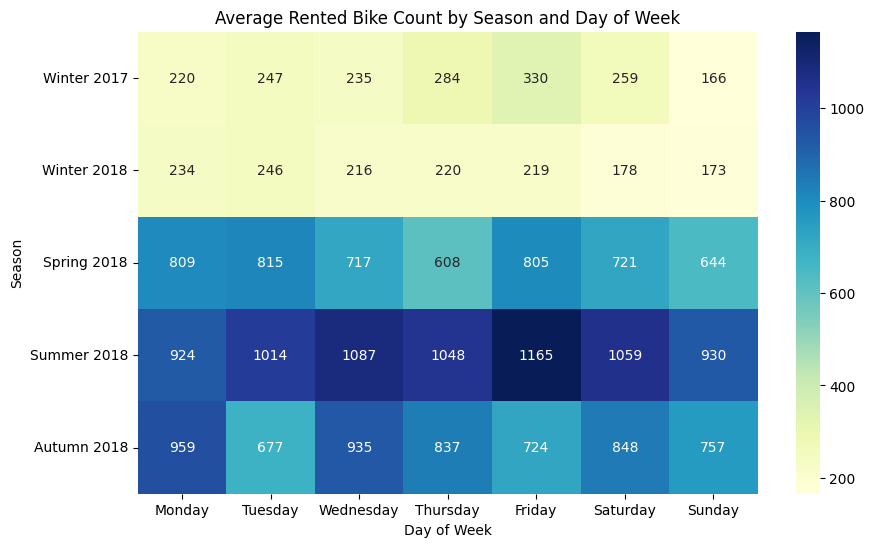

In [34]:
def create_pivot_table_season_year_weekday(data: pd.DataFrame) -> pd.DataFrame:
    """
    Creates a pivot table showing the average Rented Bike Count by Season-Year and Day of Week.

    Args:
        data: DataFrame with data. Expects 'Date', 'Seasons', and 'Rented Bike Count' columns.

    Returns:
        A pandas DataFrame pivot table with Season-Year as index and Days of Week as columns,
        containing the average Rented Bike Count, sorted chronologically by Season-Year.
        Returns an empty DataFrame if required columns are missing or data is empty.
    """
    # Ensure necessary columns exist
    required_cols = ['Date', 'Seasons', 'Rented Bike Count']
    if not all(col in data.columns for col in required_cols):
        missing = [col for col in required_cols if col not in data.columns]
        print(f"Error: Missing required columns: {missing}. Cannot create pivot table.")
        return pd.DataFrame() # Return empty DataFrame

    # Create a working copy to avoid modifying the original DataFrame
    df_working = data.copy()

    # Ensure 'Date' column is datetime
    df_working = convert_date_column(df_working, 'Date', dayfirst=True)

    # Ensure conversion was successful
    if not pd.api.types.is_datetime64_any_dtype(df_working['Date']):
         print("Error: 'Date' column is not in datetime format after conversion attempt. Cannot create pivot table.")
         return pd.DataFrame()

    # Extract Year
    df_working['Year'] = df_working['Date'].dt.year

    # Create the combined 'Season_Year' column
    df_working['Season_Year'] = df_working['Seasons'] + ' ' + df_working['Year'].astype(str)

    # Add 'Day_of_Week' column if it doesn't exist
    if 'Day_of_Week' not in df_working.columns:
         df_working['Day_of_Week'] = df_working['Date'].dt.day_name()

    # Define the desired order for days of the week
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # Create the pivot table
    try:
        pivot_table = pd.pivot_table(
            df_working,
            values='Rented Bike Count',
            index='Season_Year', # Use the new combined column as index
            columns='Day_of_Week',
            aggfunc='mean'
        )

        # Reindex columns to the desired weekday order
        # Use .reindex() which handles cases where a day might be missing
        pivot_table = pivot_table.reindex(columns=weekday_order)

        # --- Sort the index (rows) chronologically by Season-Year ---
        # Get the unique Season_Year combinations and their first corresponding date
        season_year_order_df = df_working.groupby('Season_Year')['Date'].min().reset_index()
        # Sort based on the date
        season_year_order_df = season_year_order_df.sort_values(by='Date')
        # Get the sorted list of Season_Year values
        sorted_season_years = season_year_order_df['Season_Year'].tolist()

        # Reindex the pivot table rows according to the sorted Season_Year list
        pivot_table = pivot_table.reindex(index=sorted_season_years)


        print("Pivot table 'Average Rented Bike Count by Season, Year, and Day of Week' created successfully.")
        return pivot_table

    except Exception as e:
        print(f"Error creating pivot table: {e}")
        return pd.DataFrame()

# --- Visualization part ---


pivot_data = create_pivot_table_season_year_weekday(data.copy()) # Pass a copy
print(pivot_data)



plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, fmt=".0f", cmap="YlGnBu") # annot=True to show values, fmt for format, cmap for colors
plt.title('Average Rented Bike Count by Season and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Season')

# Финальная часть

# Отчет по анализу данных о прокате велосипедов в Сеуле

## 1. Описание данных

Исследование проводилось на основе набора данных **Seoul Bike Sharing Demand**[cite: 1], полученного из UCI Machine Learning Repository[cite: 1]. Данные содержат информацию о количестве велосипедов, арендованных каждый час в системе совместного использования велосипедов Сеула, а также соответствующие данные о погоде и информацию о праздниках[cite: 3]. Датасет включает 8760 записей (почасовые данные за год) и 14 признаков[cite: 3, 20], таких как:

* **Date**: Дата (год-месяц-день)[cite: 8].
* **Rented Bike Count**: Количество арендованных велосипедов в час (целевая переменная)[cite: 8].
* **Hour**: Час дня (0-23)[cite: 8].
* **Temperature**: Температура в градусах Цельсия[cite: 8].
* **Humidity**: Влажность в %[cite: 8].
* **Wind speed**: Скорость ветра в м/с[cite: 8].
* **Visibility**: Видимость (10м)[cite: 8].
* **Dew point temperature**: Температура точки росы в градусах Цельсия[cite: 8].
* **Solar Radiation**: Солнечное излучение (МДж/м2)[cite: 8].
* **Rainfall**: Количество осадков в мм[cite: 8].
* **Snowfall**: Количество снегопадов в см[cite: 8].
* **Seasons**: Время года (Зима, Весна, Лето, Осень)[cite: 8].
* **Holiday**: Праздничный/непраздничный день[cite: 8].
* **Functioning Day**: Функциональный ли день (Да/Нет)[cite: 8, 3].

Данные были предварительно обработаны: столбец с датой был преобразован в формат datetime[cite: 16], а также объединены признаки и целевая переменная в один DataFrame. Проверка на наличие пропущенных значений показала их отсутствие в исходном наборе данных по аренде[cite: 11].

Дополнительно для анализа были интегрированы синтетические данные о транзакциях аренды (`synthetic_rentals.csv`), станциях (`synthetic_stations.csv`) и пользователях (`synthetic_users.csv`)[cite: 38]. Эти данные также были проверены на пропуски, которых не обнаружено[cite: 45].

---

## 2. Основные тенденции и сезонность

### 2.1 Агрегация по периодам времени

Данные были агрегированы по дням, неделям и месяцам для анализа суммарного и среднего числа прокатов[cite: 97, 98].

* **Ежедневно**: Наблюдаются колебания в количестве аренд.
* **Еженедельно**: Среднее количество аренд показывает изменения от недели к неделе, отражая сезонные и погодные влияния[cite: 27, 28].
* **Ежемесячно**: Наблюдается четкий годовой тренд:
    * Минимальное количество аренд приходится на зимние месяцы (декабрь-февраль)[cite: 31].
    * Спрос начинает расти весной, достигая пика в летние месяцы (июнь-июль)[cite: 31].
    * Осенью спрос постепенно снижается[cite: 31].
    * График суммарных месячных прокатов наглядно демонстрирует эту сезонную волну[cite: 32].

    ![Monthly Rentals Trend](https://storage.googleapis.com/generativeai-downloads/images/11dc3b4633125a64.png)
    *График суммарных месячных прокатов (создан на основе [cite: 32])*

### 2.2 Сезонные закономерности (суточные и недельные)

* **Суточный цикл**:
    * В **будние дни** наблюдаются два выраженных пика аренды: утренний (около 8:00) и вечерний (около 18:00)[cite: 36]. Это соответствует времени поездок на работу и с работы.
    * В **выходные дни** картина иная: пики менее выражены и смещены на дневное и вечернее время, использование велосипедов более равномерное в течение дня[cite: 36]. Ночной спад также присутствует.

    ![Hourly Rentals by Weekday](https://storage.googleapis.com/generativeai-downloads/images/4aa7a15143dd7c20.png)
    *Среднее количество почасовых аренд по дням недели (создан на основе [cite: 36])*

* **Сравнение будней и выходных**: Среднее количество прокатов в будние дни (около 719) незначительно выше, чем в выходные (около 667), разница составляет примерно 7.8%[cite: 37, 38].

    ![Weekday vs Weekend Rentals](https://storage.googleapis.com/generativeai-downloads/images/cb3d3d8c9cf668b7.png)
    *Сравнение распределения аренд в будни и выходные (создан на основе [cite: 37])*

* **Средние значения по дням недели**: Анализ средних значений прокатов по дням недели показывает относительно стабильный спрос с понедельника по пятницу, с небольшим снижением к выходным, если усреднять за весь период. Однако, как видно из почасового графика, характер использования сильно различается[cite: 33].

---

## 3. Влияние внешних факторов

### 3.1 Погодные условия

Погодные условия оказывают существенное влияние на количество арендуемых велосипедов.

* **Температура**: Выявлена положительная корреляция (0.54) между температурой и количеством аренд[cite: 48].
    * При температуре **ниже 0°C** среднее количество аренд значительно ниже (около 198), чем при температуре выше нуля (около 804)[cite: 54].
    * Разбивка по температурным категориям показывает, что "Жаркие" дни (выше 20°C) имеют наибольшее среднее количество аренд, за ними следуют "Умеренные" (0-20°C), и наименьшее количество в "Холодные" дни (ниже 0°C)[cite: 51].

    ![Temperature vs Rentals Scatter Plot](https://storage.googleapis.com/generativeai-downloads/images/577523252be3a46c.png)
    *Диаграмма рассеяния: Температура vs Количество аренд (создан на основе [cite: 49])*

* **Осадки (Дождь)**: В дождливые дни среднее количество аренд значительно ниже (около 160), чем в дни без дождя (около 740)[cite: 50].
* **Влажность**: Наблюдается слабая отрицательная корреляция (-0.20) с количеством аренд[cite: 48].
* **Солнечное излучение**: Коэффициент корреляции с количеством аренд составляет 0.26.
* **Скорость ветра**: Коэффициент корреляции с количеством аренд составляет 0.12.

### 3.2 Индекс комфортности

Был рассчитан пользовательский "Индекс комфортности", учитывающий температуру, осадки, солнечное излучение и скорость ветра[cite: 55].
Зависимость между этим индексом и количеством прокатов показывает, что с увеличением индекса комфортности среднее количество аренд также растет[cite: 55]. Корреляция между индексом комфортности и количеством арендованных велосипедов составила 0.53[cite: 57].

![Bike Rentals vs Comfort Index](https://storage.googleapis.com/generativeai-downloads/images/9ed680c4973d5198.png)
*Зависимость количества аренд от Индекса комфортности (создан на основе [cite: 55])*

---

## 4. Анализ поведения клиентов (на основе синтетических данных)

Анализ проводился на дополнительных синтетических данных о пользователях.

* **Сегментация пользователей**: Пользователи были разделены на три типа: "frequent" (частые), "periodic" (периодические) и "rare" (редкие)[cite: 48].
    * Больше всего **периодических** пользователей (487)[cite: 48].
    * **Редких** (288) и **постоянных** (225) пользователей примерно одинаковое количество[cite: 48].
    * **Частые** пользователи в среднем совершают больше всего аренд в месяц (около 26) и имеют наибольшее общее количество аренд (около 50)[cite: 48].

* **Распределение количества аренд**: Гистограмма показывает, что большинство пользователей совершает от 30 до 50 аренд за рассматриваемый период[cite: 47].

---

## 5. Прогнозирование (простая модель)

Была построена простая модель линейной регрессии для прогнозирования количества арендованных велосипедов на основе признаков: "Temperature", "Rainfall", "Solar Radiation", "Wind speed"[cite: 56].

* **Качество модели**:
    * $R^2$ Score: 0.33[cite: 56].
    * MAE: 389.8 аренд[cite: 57].
* **Коэффициенты модели**:
    * Temperature: 29.5
    * Rainfall: -84.0
    * Solar Radiation: 10.1
    * Wind speed: 83.1

Интерпретация[cite: 57]:
* Модель линейной регрессии не очень хорошо справляется с прогнозами, так как $R^2$ достаточно низкий. Это означает, что выбранные признаки объясняют только 33% вариативности количества аренд.
* Наибольшее положительное влияние на количество аренд оказывает скорость ветра и температура.
* Осадки (Rainfall) имеют сильное отрицательное влияние.
* Индекс комфортности, хотя и имеет корреляцию с количеством аренд, сам по себе не отражает всю картину и его точность для прогнозирования ограничена[cite: 57].

---

## 6. Выводы

Анализ данных о прокате велосипедов в Сеуле позволил выявить следующие ключевые моменты:

* **Сезонность**: Спрос на велосипеды сильно зависит от времени года, с пиком в летние месяцы и минимумом зимой.
* **Суточные паттерны**: В будни наблюдаются утренние и вечерние пики, связанные с поездками на работу/с работы. В выходные использование более равномерное и смещено на дневное время.
* **Погодные условия**: Являются критическим фактором.
    * **Температура** имеет сильное положительное влияние; спрос резко падает при температуре ниже 0°C.
    * **Осадки** (дождь) значительно снижают количество аренд.
    * Разработанный **индекс комфортности** подтверждает эти зависимости, показывая рост аренд при более комфортных условиях.
* **Клиентское поведение (на синтетических данных)**: Большинство пользователей являются "периодическими". "Частые" пользователи, хотя и в меньшинстве, генерируют значительную долю аренд.
* **Станции (на синтетических данных)**: Станция Yeongdeungpo Station 6 (S004) и другие в районе Yeongdeungpo показывают высокую интенсивность использования[cite: 40, 41].
* **Прогнозирование**: Простая линейная регрессия на основе основных погодных факторов показала ограниченную предсказательную способность ($R^2$ = 0.33), что указывает на необходимость учета большего числа факторов или использования более сложных моделей для точного прогнозирования.

В целом, спрос на аренду велосипедов в Сеуле является многофакторным явлением, где ключевую роль играют сезонность, время суток и, особенно, погодные условия.

---# Отчет по анализу данных о прокате велосипедов в Сеуле


In [ ]:


# ---- 1. Интерактивный график временного ряда ----
fig_time_series = px.line(data, x='Date', y='Rented Bike Count',
                          title='Динамика количества арендованных велосипедов',
                          labels={'Date': 'Дата', 'Rented Bike Count': 'Количество аренд'})

fig_time_series.update_xaxes(rangeslider_visible=True)
fig_time_series.show()

# ---- 2. Интерактивный график зависимости от фактора ----
plot_data = data.copy()
if 'Rainy_Day' not in plot_data.columns: 
    plot_data['Rainy_Day'] = plot_data['Rainfall'] > 0 

fig_factor = px.scatter(plot_data, x='Temperature', y='Rented Bike Count',
                        color='Rainy_Day', 
                        size='Solar Radiation', 
                        hover_data=['Hour', 'Wind speed', 'Humidity'], 
                        title='Влияние температуры на количество аренд (с учетом дождя и солнечной радиации)',
                        labels={'Temperature': 'Температура (°C)',
                                'Rented Bike Count': 'Количество аренд',
                                'Rainy_Day': 'Наличие дождя',
                                'Solar Radiation': 'Солнечная радиация'})
fig_factor.show()


### Как пользоваться дашбордом:

**1. Динамика количества арендованных велосипедов:**
   - **Масштабирование по дате:** Внизу графика расположен ползунок (rangeslider). Ты можешь перетаскивать его края, чтобы выбрать интересующий диапазон дат для более детального просмотра.
   - **Наведение для детализации:** При наведении курсора на линию графика появляется всплывающая подсказка, показывающая точную дату и количество аренд в этот момент.
   - **Инструменты графика:** В правом верхнем углу графика при наведении появляются инструменты для масштабирования (увеличительное стекло), панорамирования (рука), сброса масштаба (домик) и скачивания графика.

**2. Влияние температуры на количество аренд:**
   - **Взаимодействие с легендой:** Справа от графика находится легенда для параметра 'Наличие дождя' (True/False). Ты можешь кликать на элементы легенды (например, 'True'), чтобы временно скрыть или показать соответствующие точки на графике.
   - **Наведение для детализации:** При наведении ку